**Reinaldo Toledo**

**Cifrado de imágenes usando AES con la librería PyDes** 

**Introducción a la criptografía y la seguridad de la información**

**2023-1**


Instalamos la librería correspondiente al algoritmo de ciframiento DES

In [ ]:
pip install pyaes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26364 sha256=b04f966ade931f39ac45a1dcdd656490694d159a4d4e0453af62fd8a81bf6406
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


Código correspondiente a encriptación y desencriptación de imágenes usando pyDes

********

Rey 7910
Image Cipher using AES algorithm with PyAes  
Introduction to criptography and security of information
2023-1

********


Saving Test 1.jpg to Test 1 (2).jpg
Please enter the key for the AES cipher, it musta 128-bit key, 16 bytes long: clave de ejemplo
Here is your image in base64: b'UklGRvhNAQBXRUJQVlA4IOxNAQDQ9QOdASogAyADPjEYiUOiIaETalUwIAMEtLdwu3cBW4l85HPj3wJ01FMf4zzleN/8l/W/3A/tHbP+473AP0w/uv5bf3vuteYn+cf2n/s/3j3Wf9v+t3u5/YD2Fv47/eOtV/ar2EP2t9NX9xPhT/a39m/gE/kn921XrzZ/dvyE8G/8R+W37s+o/kh+f/v/+j9vv7Q+r+936z/Lf+//UeoP87/If9b/HfvD+8n+z+5H8Z/7v9T4k/JH/r/0XsC/m/9Z/6H5wflr9Bn0/7b9yZsH+j/af2BfdH7t/5f9D+8//B/c755PsP229R/1v/R//P3Af6b/ff/B+d/w7/2PA+/Ff8z92fgB/sP+k/9/+1/eH/T/TP/kf/j/i/8r92vbd+v/7z/8f7/4C/2R/83+n/ej9//+39+//3/8nw+/fL///+r4gf3T//haEHNAoQBzaENnpzQAmhscKAc0ChAHNoQ2enNACVonjSqThoFCAFkmvvTMh8JowGYx49h3PxuSmkhJUbnu/3thbns1B8lQg2cKjIlDTzgDm0IbPTmgBNDY4Fnhb1K0VIEsAQ3/yFbDdziJgGUlFui2yXdqMO02dG4yxSsNA32YdUHZH3U/H9nFbCSNt0wsTjHxAOntCiAENPV+iQ+h2R0b1ygjDjlpK1t9fWOBaehSLmz94IXRpiOtt16mUCltgdXaua7cgXWoiDmwrLk1CsqTMOL2clYGHbtAoQBzaENnpzQAmhscJaL2fFFoeP/xUurxQNC3/Kve6YWWRONQA/dsec6ij5H5vdlem4zffXQFul4LidV90sFcJ

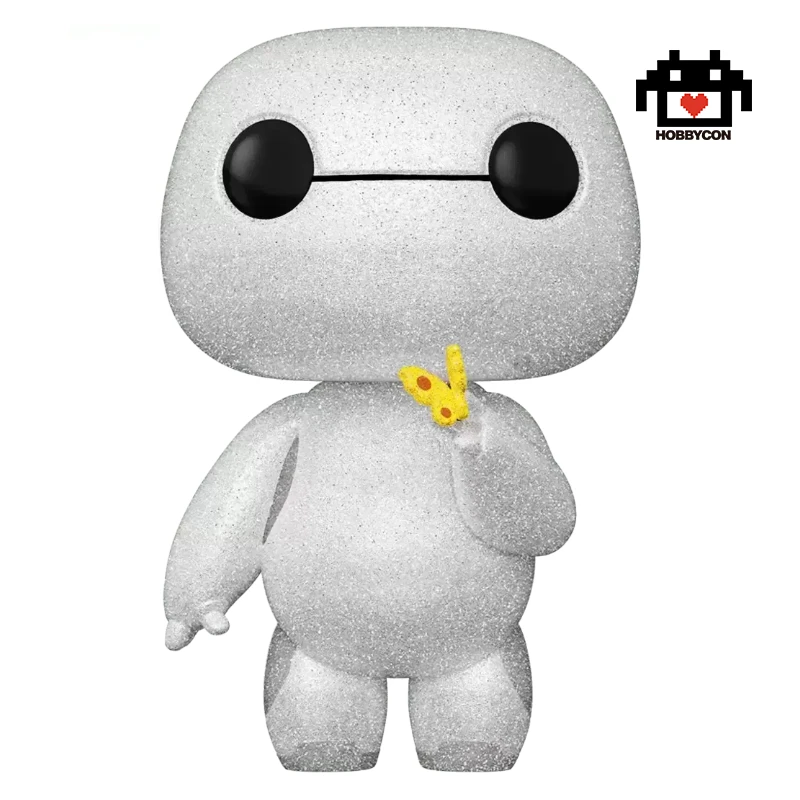

In [24]:
''''
Rey 7910
Image Cipher using AES algorithm with PyAes 
Introduction to criptography and security of information
2023-1
'''



from google.colab import files
import base64
import pyaes
from io import BytesIO
from PIL import Image


def encrypt_and_decrypt():

  # File uploading
  image_file = files.upload()

  
  # Key input
  key = input("Please enter the key for the AES cipher, it musta 128-bit key, 16 bytes long: ").encode()

  # AES cipher setting
  aes = pyaes.AES(key)

  # Get the image name by querying the first key of the dict
  image_name = next(iter(image_file))

  # Convert the image to base64
  base64_image = base64.b64encode(image_file[image_name])

  # Print the image converted to base64
  print("Here is your image in base64: "+str(base64_image))

  # Añadir relleno al mensaje si es necesario (para que tenga longitud múltiplo de 16 bytes)
  padding_length = 16 - (len(base64_image) % 16)
  padder = chr(padding_length).encode() * padding_length
  padded_message = base64_image + padder

  # Encrypt the image
  encrypted_image= b''
  
  # we divide the message into blocks of 16 bytes length
  for i in range(0, len(padded_message), 16):
    block = padded_message[i:i+16]
    aes = pyaes.AES(key)
    encrypted_block = aes.encrypt(block)
    encrypted_image += bytes(encrypted_block)

  # Print the encrypted image

  print("Here is your encrypted image: ",encrypted_image)

  # Decrypt the encrypted image

  decrypted_image= b''
  # we divide the encrypted message into blocks of 16 bytes length
  for i in range(0, len(encrypted_image), 16):
    block = encrypted_image[i:i+16]
    aes = pyaes.AES(key)
    decrypted_block = aes.decrypt(block)
    decrypted_image += bytes(decrypted_block)

  # Show the decrypted image in base64
  print("Here is your decrypted image: ",decrypted_image)


  # Convert the Base64 string to bytes
  decoded_image = base64.b64decode(decrypted_image)

  # Open the image from bytes
  image = Image.open(BytesIO(decoded_image))

  # Show the image
  print("\n\n\nHere is the image you have selected after being encrypted and decrypted successfully :D")
  image.show()

# header
print("********\n\nRey 7910\nImage Cipher using AES algorithm with PyAes  \nIntroduction to criptography and security of information\n2023-1\n\n********")

# call to the main function
encrypt_and_decrypt()
